In [18]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import accuracy_score, brier_score_loss

%matplotlib inline

from collections import Counter
sns.set(style='white', context='notebook', palette='deep')

In [2]:
dataset = pd.read_csv("adult.csv")
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [3]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [4]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


In [6]:
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

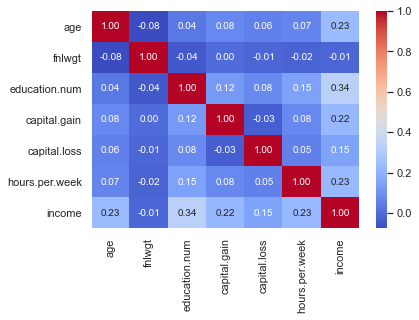

In [7]:
sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

/Users/rsilvei/.pyenv/versions/bayesian/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rsilvei/.pyenv/versions/bayesian/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


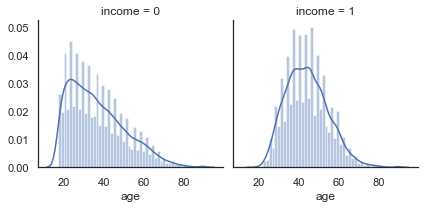

In [8]:
g = sns.FacetGrid(dataset, col='income')
g.map(sns.distplot, "age")

In [9]:
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native.country"] = dataset["native.country"].fillna("United-States")
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [10]:
dataset["sex"] = dataset["sex"].map({"Male": 0, "Female":1})
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})
dataset["marital.status"] = dataset["marital.status"].astype(int)
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,0,?,Not-in-family,White,1,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,0,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,0,?,Unmarried,Black,1,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,0,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,0,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0


In [11]:
# Drop the data you don't want to use
dataset.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(dataset.head())

Dataset with Dropped Labels
   age  fnlwgt  education.num  marital.status  sex  capital.gain  \
0   90   77053              9               0    1             0   
1   82  132870              9               0    1             0   
2   66  186061             10               0    1             0   
3   54  140359              4               0    1             0   
4   41  264663             10               0    1             0   

   capital.loss  hours.per.week  income  
0          4356              40       0  
1          4356              18       0  
2          4356              40       0  
3          3900              40       0  
4          3900              40       0  


In [12]:
dataset

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,1,0,4356,40,0
1,82,132870,9,0,1,0,4356,18,0
2,66,186061,10,0,1,0,4356,40,0
3,54,140359,4,0,1,0,3900,40,0
4,41,264663,10,0,1,0,3900,40,0
...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,0,0,40,0
32557,27,257302,12,1,1,0,0,38,0
32558,40,154374,9,1,0,0,0,40,1
32559,58,151910,9,0,1,0,0,40,0


In [13]:
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.20
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

In [14]:
def plot_calibration_curve(array_probas, array_true_label, num_bins=5):

    ## Prepare Array
    array_probas=(array_probas - array_probas.min()) / (array_probas.max() - array_probas.min())
    df_probas = pd.DataFrame({'probas': array_probas, 'label': array_true_label})
    df_probas['bins'] = pd.cut(df_probas.probas, num_bins, labels=np.arange(num_bins))
    bined_plot = df_probas.groupby('bins').mean()

    ## Calculate Brier Score
    brier_plot = brier_score_loss(array_true_label, array_probas)
    
    ## Plot Calibration Curve
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    ax1.plot(bined_plot['probas'], bined_plot['label'], "s-", label="Reliability Plot")
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.set_title('Calibration plots  (reliability curve)')
    
    bbox_props = dict(boxstyle="round", fc="lightgrey", ec="brown", lw=2)
    ax1.text(0.1, 0.9, "Brier Score: {:.4f}".format(brier_plot), ha="center", va="center", size=14, weight = 'bold', bbox=bbox_props)
    
    ax2.hist(df_probas['probas'], range=(0, 1), bins=num_bins, histtype="step", lw=2)
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax1.grid()
    ax2.grid()
    plt.tight_layout()
    plt.show()

In [15]:
def plot_compare_calibration(array_probas, array_probas_calibrated, array_true_label, num_bins=5):

    ## Prepare Array
    array_probas=(array_probas - array_probas.min()) / (array_probas.max() - array_probas.min())
    array_probas_calibrated =(array_probas_calibrated - array_probas_calibrated.min()) / (array_probas_calibrated.max() - array_probas_calibrated.min())
    
    df_probas = pd.DataFrame({'probas': array_probas, 
                              'calibrated':array_probas_calibrated,
                              'label': array_true_label})
    df_probas['bins'] = pd.cut(df_probas.probas, num_bins, labels=np.arange(num_bins))
    bined_plot = df_probas.groupby('bins').mean()

    ## Calculate Brier Score
    brier_plot_prior = brier_score_loss(array_true_label, array_probas)
    brier_plot_calib = brier_score_loss(array_true_label, array_probas_calibrated)
    
    ## Plot Calibration Curve
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    ax1.plot(bined_plot['probas'], bined_plot['label'], color='green', linestyle='dashed', label="Reliability Plot")
    ax1.plot(bined_plot['calibrated'], bined_plot['label'], color='orange', linestyle='solid', label="Reliability Plot")
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.set_title('Calibration plots  (reliability curve)')
    
    ax1.text(0.1, 0.9, "Brier Score: {:.4f}".format(brier_plot_prior), size=14, bbox={'boxstyle': 'round', 'fc': 'lightgrey', 'ec': 'green', 'lw': 2})
    ax1.text(0.1, 0.8, "Brier Score Calibrated: {:.4f}".format(brier_plot_calib), size=14, bbox={'boxstyle': 'round', 'fc': 'lightgrey', 'ec': 'orange', 'lw': 2})

    ax1.grid()
    plt.tight_layout()
    plt.show()

## Models

In [16]:
rf = RandomForestClassifier(n_estimators=10,max_features=5)
rf.fit(X_train, Y_train)
preds_proba_rf = rf.predict_proba(X_validation)
preds_rf = rf.predict(X_validation)
accuracy_score(Y_validation, preds_rf)

0.8404729003531399

In [17]:
ab = AdaBoostClassifier(n_estimators=10)
ab.fit(X_train, Y_train)
preds_proba_ab = ab.predict_proba(X_validation)
preds_ab = ab.predict(X_validation)
accuracy_score(Y_validation, preds_ab)

0.8432366037156457

In [50]:
hidden_size = 50
nn=MLPClassifier(hidden_layer_sizes=(hidden_size, hidden_size, hidden_size), 
                 max_iter=300, 
                 activation='relu', 
                 solver='adam', 
                 learning_rate='constant')
nn.fit(X_train, Y_train)
preds_proba_nn = nn.predict_proba(X_validation)
preds_nn = nn.predict(X_validation)
accuracy_score(Y_validation, preds_nn)

0.8014739751266697

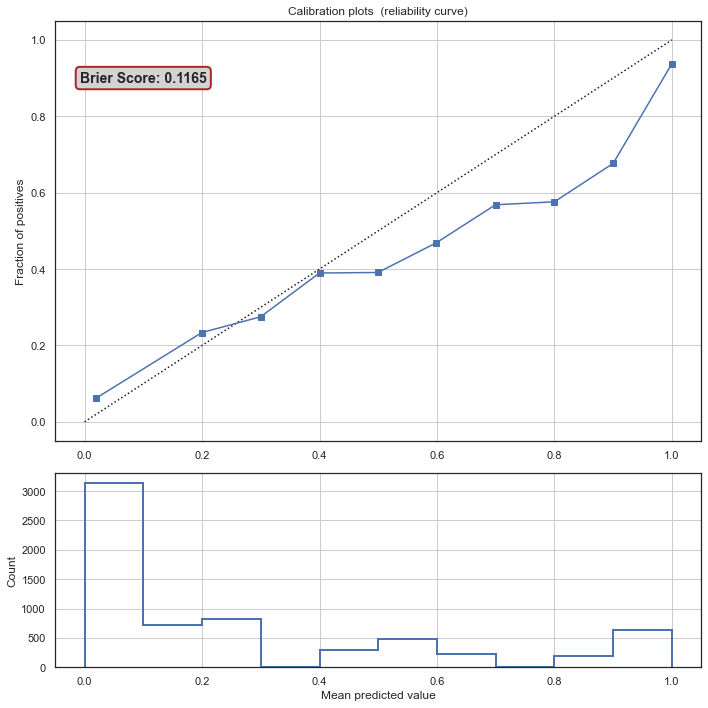

In [53]:
plot_calibration_curve(preds_proba_rf[:,1], 
                        Y_validation, 
                        num_bins=10)

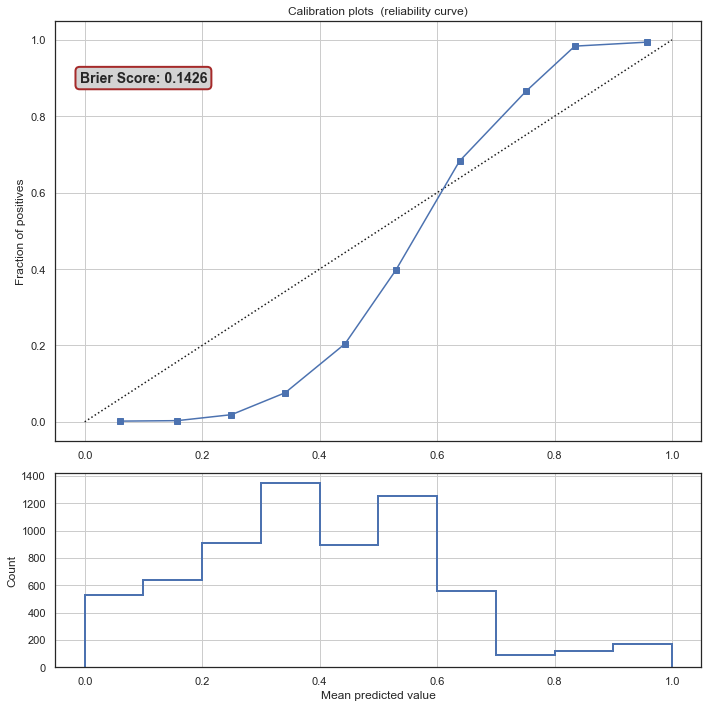

In [54]:
plot_calibration_curve(preds_proba_ab[:,1], 
                        Y_validation, 
                        num_bins=10)

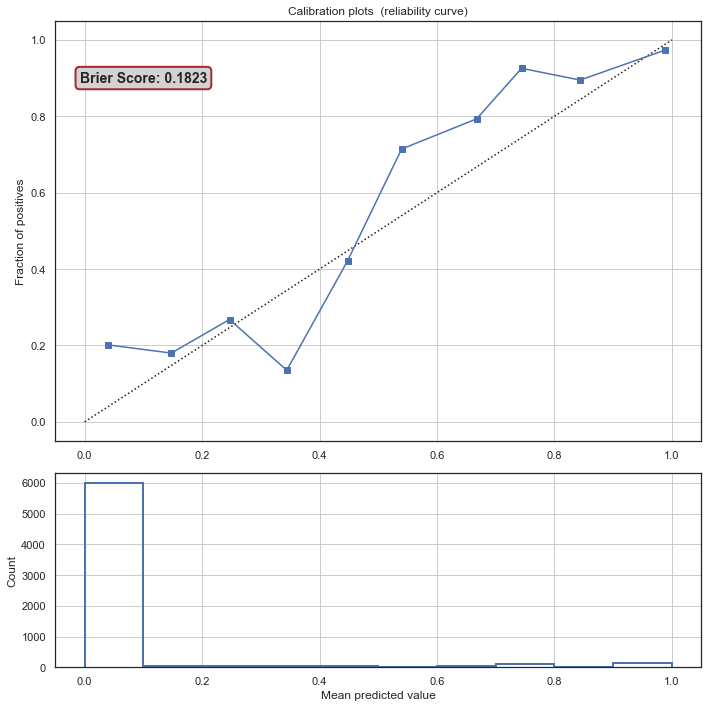

In [56]:
plot_calibration_curve(preds_proba_nn[:,1], 
                        Y_validation, 
                        num_bins=10)

## Isotonic Regression to Calibrate Preds

In [ ]:
def generate_calibrated_isotonic(uncalibrated_preds, true_label):
    xtrain = uncalibrated_preds
    ytrain = true_label
    
    ## Calibrate Models
    isotonic_model = IsotonicRegression()
    isotonic_model.fit(xtrain,ytrain)
    
    calibrated_preds = isotonic_model.predict(uncalibrated_preds)

    return calibrated_preds

In [ ]:
calibrated_probs_rf = generate_calibrated_isotonic(preds_proba_rf[:,1], Y_validation)
calibrated_probs_rf

#### Calibrate Random Forest w/ Isotonic Regression

In [57]:
from sklearn.calibration import CalibratedClassifierCV

In [58]:
## Random Forest w/ Plat Scalling
clf_rf_platt = CalibratedClassifierCV(rf, cv=2, method='sigmoid')
clf_rf_platt.fit(X_train, Y_train)
prob_rf_platt = clf_rf_platt.predict_proba(X_validation)[:, 1]
prob_rf_platt

array([0.06396677, 0.08099245, 0.15791716, ..., 0.06396677, 0.52751631,
       0.88129291])

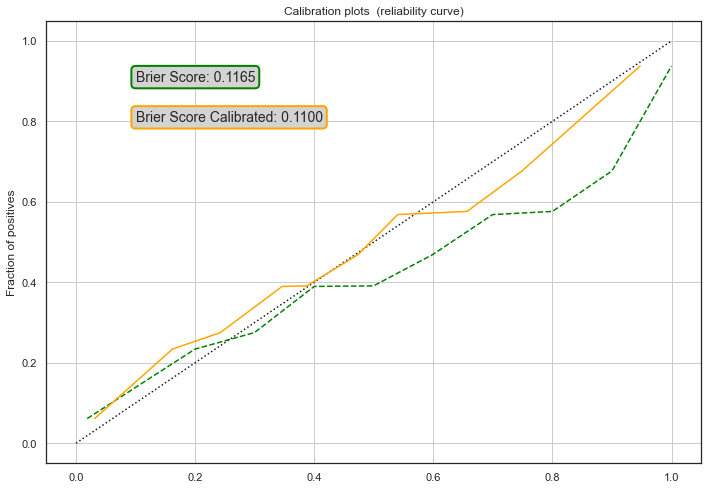

In [59]:
plot_compare_calibration(preds_proba_rf[:,1],
                         prob_rf_platt,
                         Y_validation,
                         num_bins=10)

In [60]:
## Random Forest w/ Isotonic Regression
clf_rf_isotonic = CalibratedClassifierCV(rf, cv=2, method='isotonic')
clf_rf_isotonic.fit(X_train, Y_train)
prob_rf_isotonic = clf_rf_isotonic.predict_proba(X_validation)[:, 1]
prob_rf_isotonic

array([0.0365481 , 0.10210805, 0.18762281, ..., 0.13254455, 0.39787659,
       0.93615023])

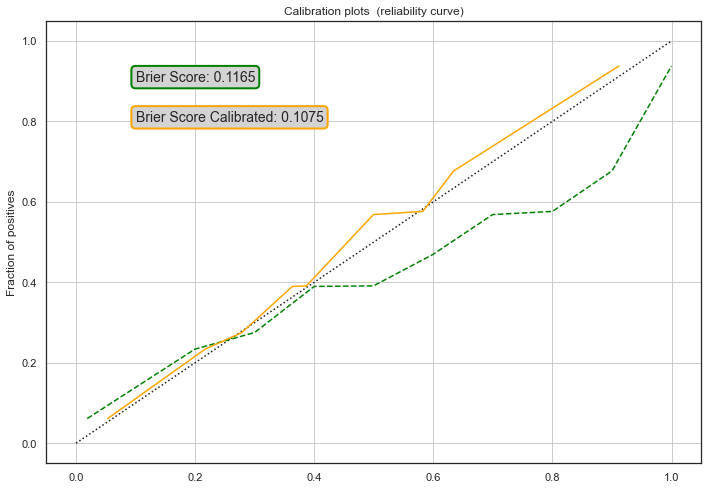

In [61]:
plot_compare_calibration(preds_proba_rf[:,1],
                         prob_rf_isotonic,
                         Y_validation,
                         num_bins=10)

In [62]:
## AdaBoost w/ Plat Scalling
clf_ab_platt = CalibratedClassifierCV(ab, cv=2, method='sigmoid')
clf_ab_platt.fit(X_train, Y_train)
prob_ab_platt = clf_ab_platt.predict_proba(X_validation)[:, 1]
prob_ab_platt

array([0.00618094, 0.01208472, 0.16576455, ..., 0.07412375, 0.33901674,
       0.99357858])

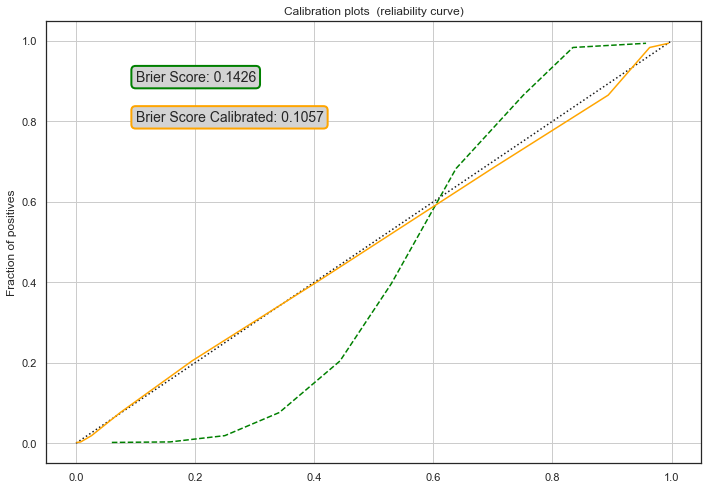

In [63]:
plot_compare_calibration(preds_proba_ab[:,1],
                         prob_ab_platt,
                         Y_validation,
                         num_bins=10)

In [64]:
## AdaBoost w/ Isotonic Regression
clf_ab_isotonic = CalibratedClassifierCV(ab, cv=2, method='isotonic')
clf_ab_isotonic.fit(X_train, Y_train)
prob_ab_isotonic = clf_ab_isotonic.predict_proba(X_validation)[:, 1]
prob_ab_isotonic

array([0.00268199, 0.00566857, 0.1702144 , ..., 0.11857375, 0.36642495,
       0.99392399])

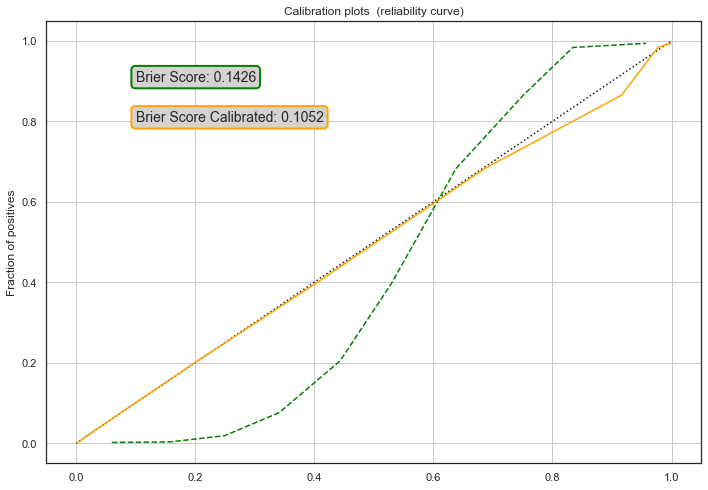

In [65]:
plot_compare_calibration(preds_proba_ab[:,1],
                         prob_ab_isotonic,
                         Y_validation,
                         num_bins=10)

In [66]:
## NN w/ Plat Scalling
clf_nn_platt = CalibratedClassifierCV(nn, cv=2, method='sigmoid')
clf_nn_platt.fit(X_train, Y_train)
prob_nn_platt = clf_nn_platt.predict_proba(X_validation)[:, 1]
prob_nn_platt

array([0.19885159, 0.62158615, 0.20055358, ..., 0.19368396, 0.2026285 ,
       0.78117717])

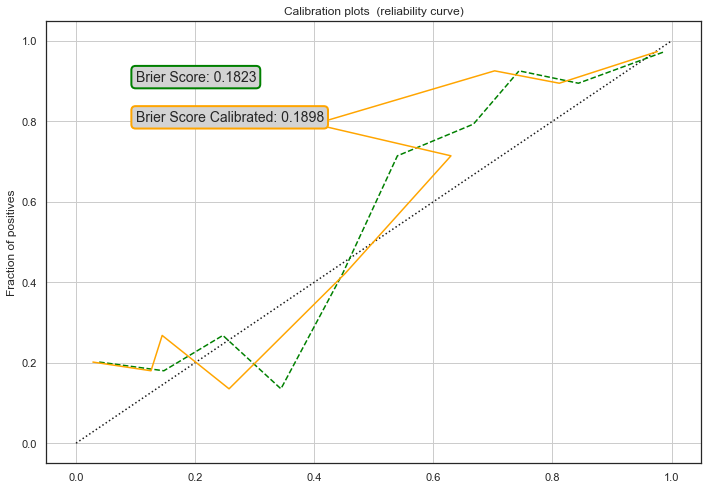

In [67]:
plot_compare_calibration(preds_proba_nn[:,1],
                         prob_nn_platt,
                         Y_validation,
                         num_bins=10)

In [72]:
## NN w/ Isotonic Regression
clf_nn_isotonic = CalibratedClassifierCV(ab, cv=2, method='isotonic')
clf_nn_isotonic.fit(X_train, Y_train)
prob_nn_isotonic = clf_nn_isotonic.predict_proba(X_validation)[:, 1]
prob_nn_isotonic

array([0.00268199, 0.00566857, 0.1702144 , ..., 0.11857375, 0.36642495,
       0.99392399])

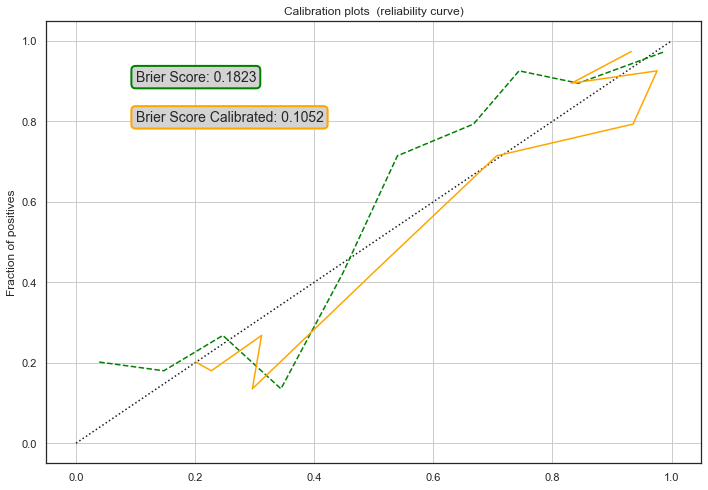

In [73]:
plot_compare_calibration(preds_proba_nn[:,1],
                         prob_nn_isotonic,
                         Y_validation,
                         num_bins=10)

### Sources
1. https://www.kaggle.com/ipbyrne/income-prediction-84-369-accuracym  
2. https://scikit-learn.org/stable/modules/calibration.html